# Homework - Stage 0

Anggota :
1. Ismawardani
2. Mufti Habibie Alayubi
3. Johannes
4. Syahdilla fitri utami


**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


In [4]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [5]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Describe Data


## Load Data

In [9]:
# Load the data from the CSV file
df1 = pd.read_csv('reviews.csv')
df2 = pd.read_csv('listings.csv')
df3 = pd.read_csv('calendar.csv')

In [10]:
df1.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [13]:
df1.info() #reviews

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [17]:
df2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [19]:
df2.info() #listings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [21]:
display(df3.head())

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [23]:
df3.info() #calendar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


Pengelompokan berdasarkan jenisnya

In [31]:
numeric_df1 = df1.select_dtypes(include=['number']).columns.tolist()

In [33]:
print(numeric_df1)

['listing_id', 'id', 'reviewer_id']


In [35]:
numeric_df2 = df2.select_dtypes(include=['number']).columns.tolist()

In [37]:
print(numeric_df2)

['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'calculated_host_listings_count', 'reviews_per_month']


In [39]:
numeric_df3 = df3.select_dtypes(include=['number']).columns.tolist()

In [43]:
print(numeric_df3)

['listing_id']


In [45]:
object_df1 = df1.select_dtypes(include=['object']).columns.tolist()   # Kolom non-numerik (string, dll.)

In [47]:
print(object_df1)

['date', 'reviewer_name', 'comments']


In [55]:
object_df2 = df2.select_dtypes(include=['object']).columns.tolist()   # Kolom non-numerik (string, dll.)

In [57]:
print(object_df2)

['listing_url', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'requires_license', 'jurisdiction_names', 'instant_bookable', 'c

In [59]:
object_df3 = df3.select_dtypes(include=['object']).columns.tolist()   # Kolom non-numerik (string, dll.)

In [61]:
print(object_df3)

['date', 'available', 'price']


# Exploratory Data Analysis (EDA)

## Univariate Analysis

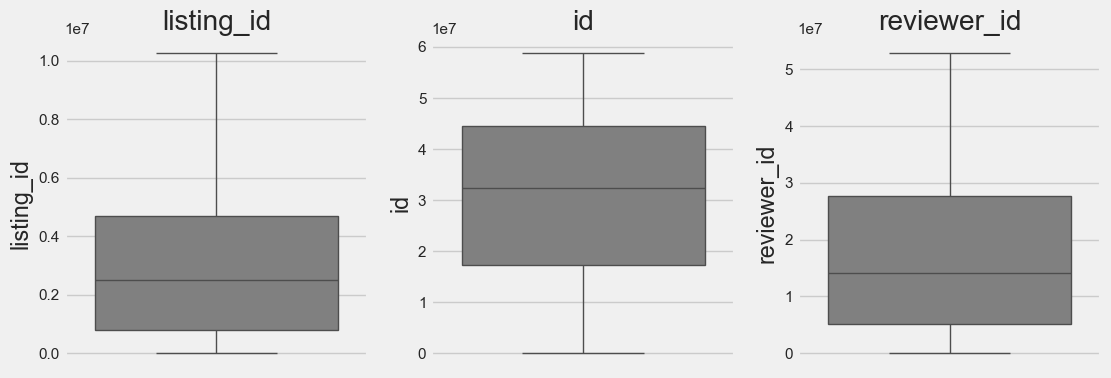

In [65]:
import math

# Tentukan jumlah baris & kolom grid layout
num_cols = 4  # Maksimal 4 kolom per baris
num_rows = math.ceil(len(numeric_df1) / num_cols)  # Tentukan jumlah baris

plt.figure(figsize=(15, 4 * num_rows))  # Ukuran figure

for i, col in enumerate(numeric_df1):
    plt.subplot(num_rows, num_cols, i+1)  # Grid layout
    sns.boxplot(y=df1[col], color='gray')  # Membuat boxplot
    plt.title(col)

plt.tight_layout()  # Tata letak otomatis
plt.show()

ValueError: List of boxplot statistics and `positions` values must have same the length

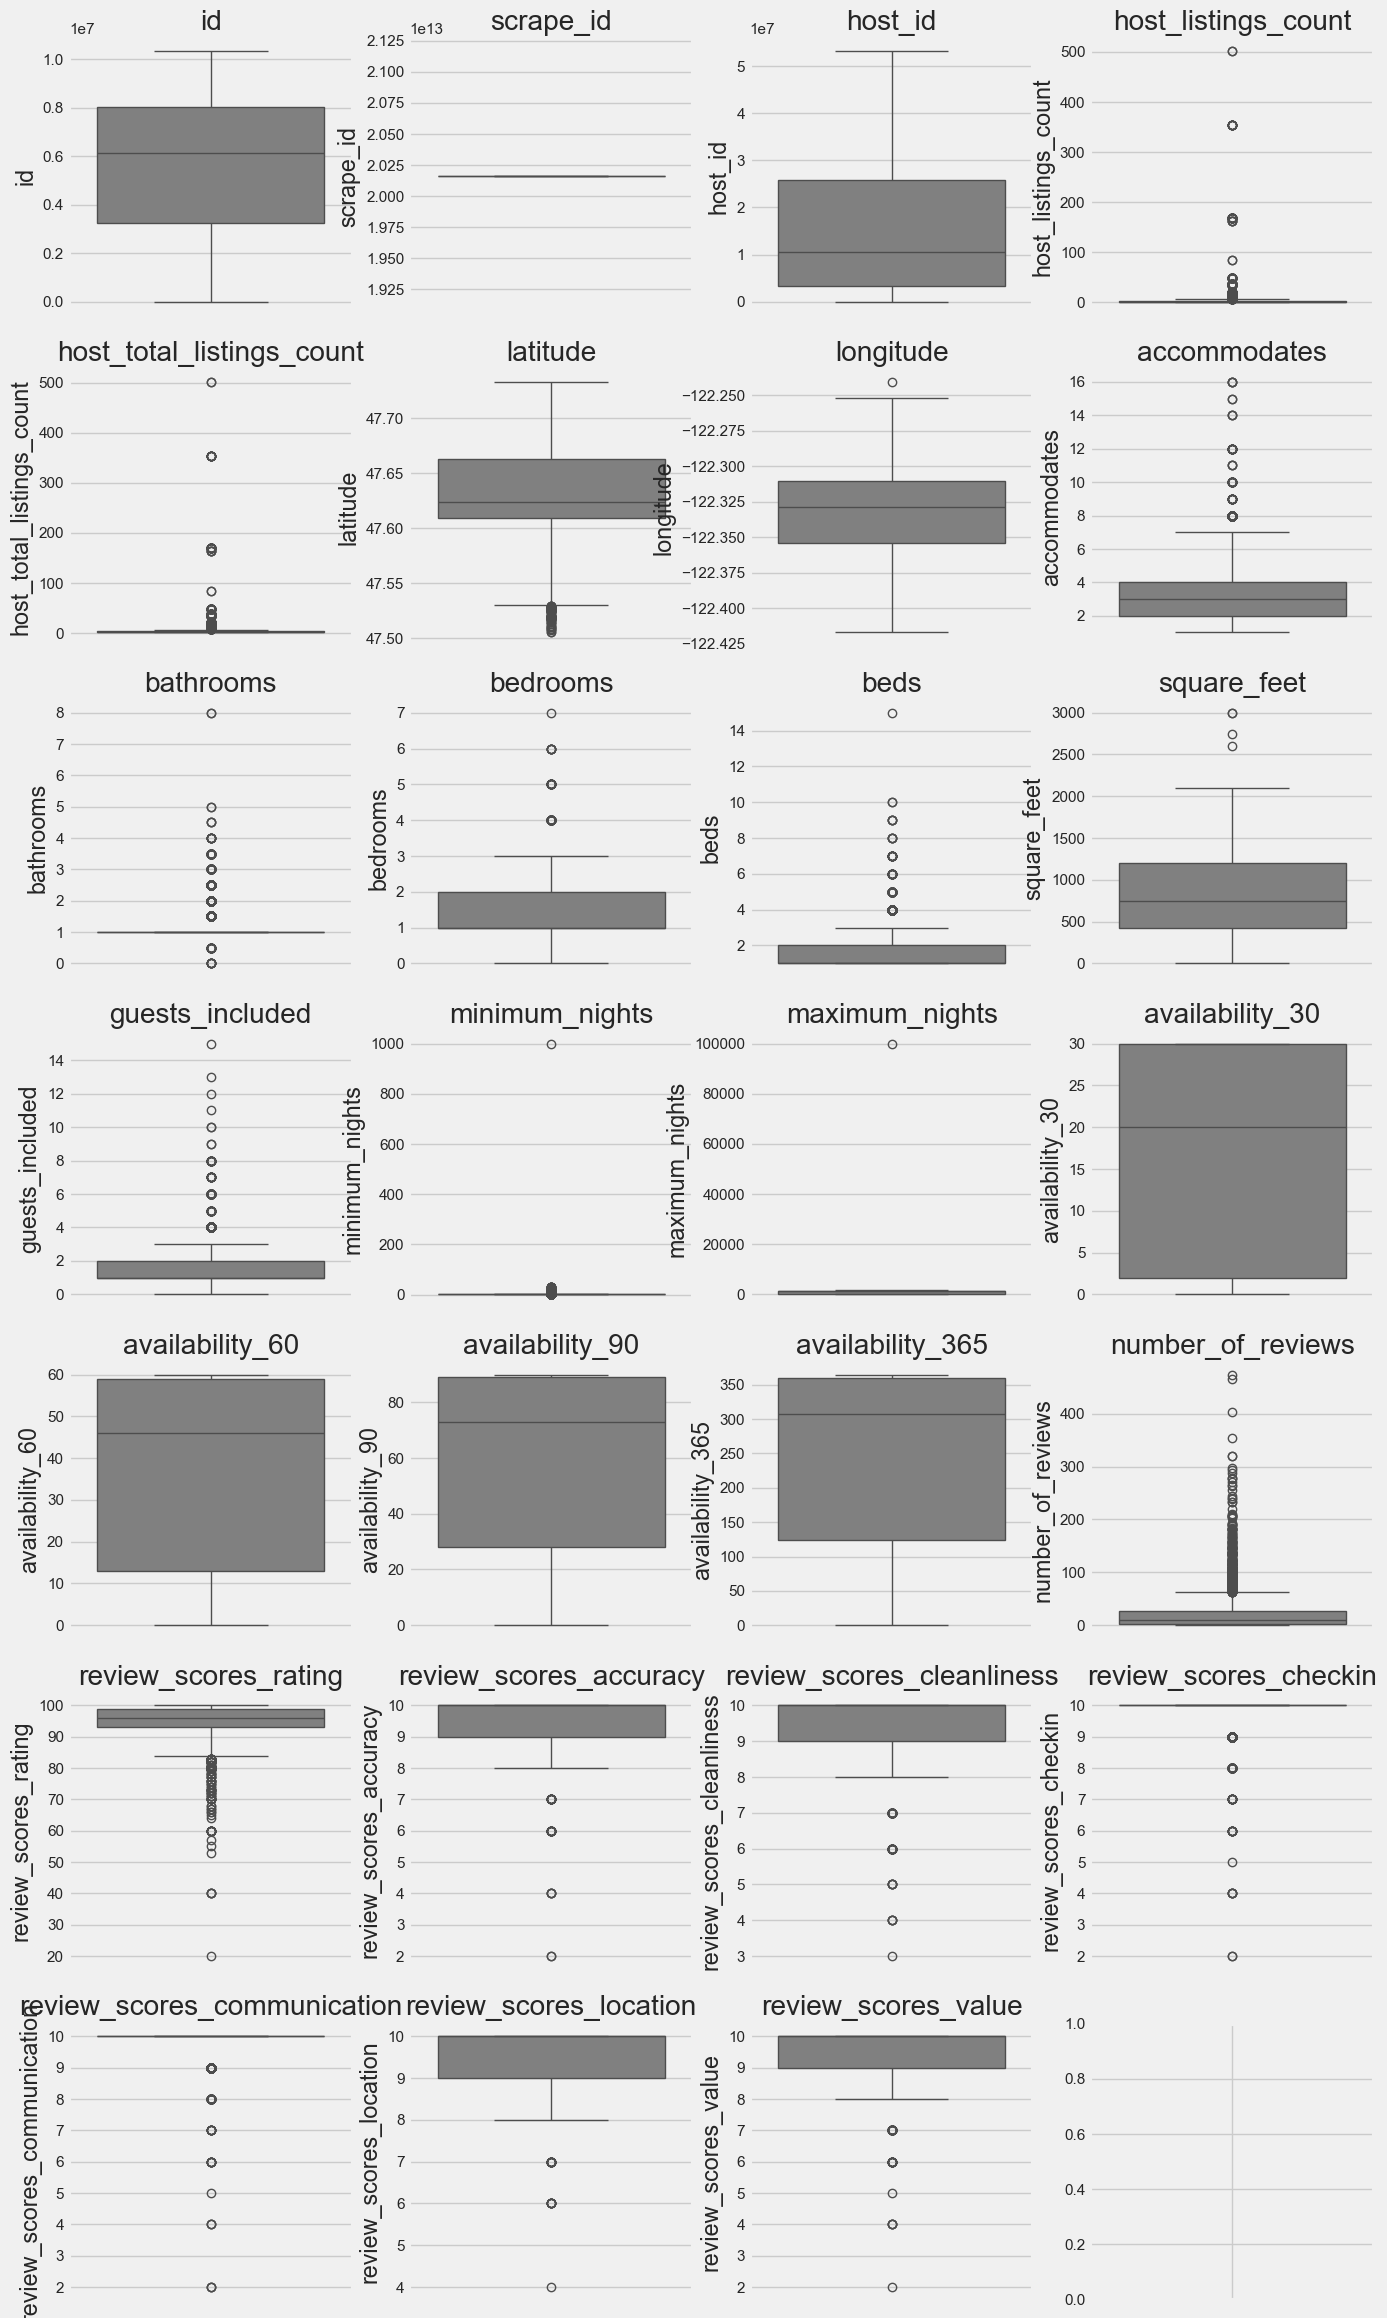

In [75]:
import math

# Tentukan jumlah baris & kolom grid layout
num_cols = 4  # Maksimal 4 kolom per baris
num_rows = math.ceil(len(numeric_df2) / num_cols)  # Tentukan jumlah baris

plt.figure(figsize=(15, 4 * num_rows))  # Ukuran figure

for i, col in enumerate(numeric_df2):
    plt.subplot(num_rows, num_cols, i+1)  # Grid layout
    sns.boxplot(y=df2[col], color='gray')  # Membuat boxplot
    plt.title(col)

plt.tight_layout()  # Tata letak otomatis
plt.show()

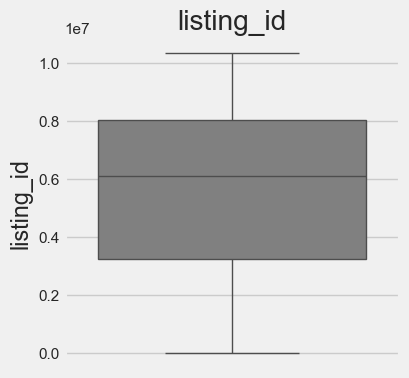

In [77]:
import math

# Tentukan jumlah baris & kolom grid layout
num_cols = 4  # Maksimal 4 kolom per baris
num_rows = math.ceil(len(numeric_df3) / num_cols)  # Tentukan jumlah baris

plt.figure(figsize=(15, 4 * num_rows))  # Ukuran figure

for i, col in enumerate(numeric_df3):
    plt.subplot(num_rows, num_cols, i+1)  # Grid layout
    sns.boxplot(y=df3[col], color='gray')  # Membuat boxplot
    plt.title(col)

plt.tight_layout()  # Tata letak otomatis
plt.show()

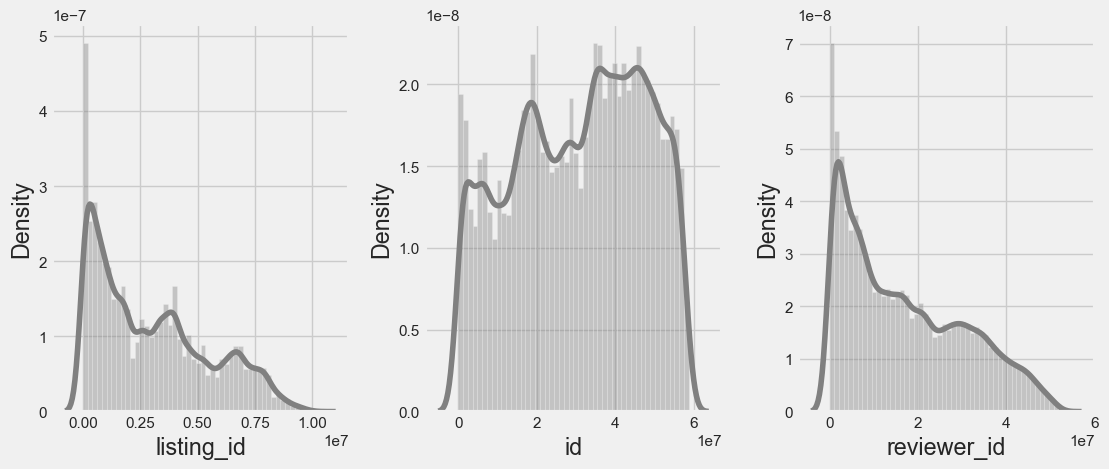

In [81]:
plt.figure(figsize=(15, 9))
for i in range(0, len(numeric_df1)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df1[numeric_df1[i]], color='gray')
    plt.tight_layout()

ValueError: num must be an integer with 1 <= num <= 8, not 9

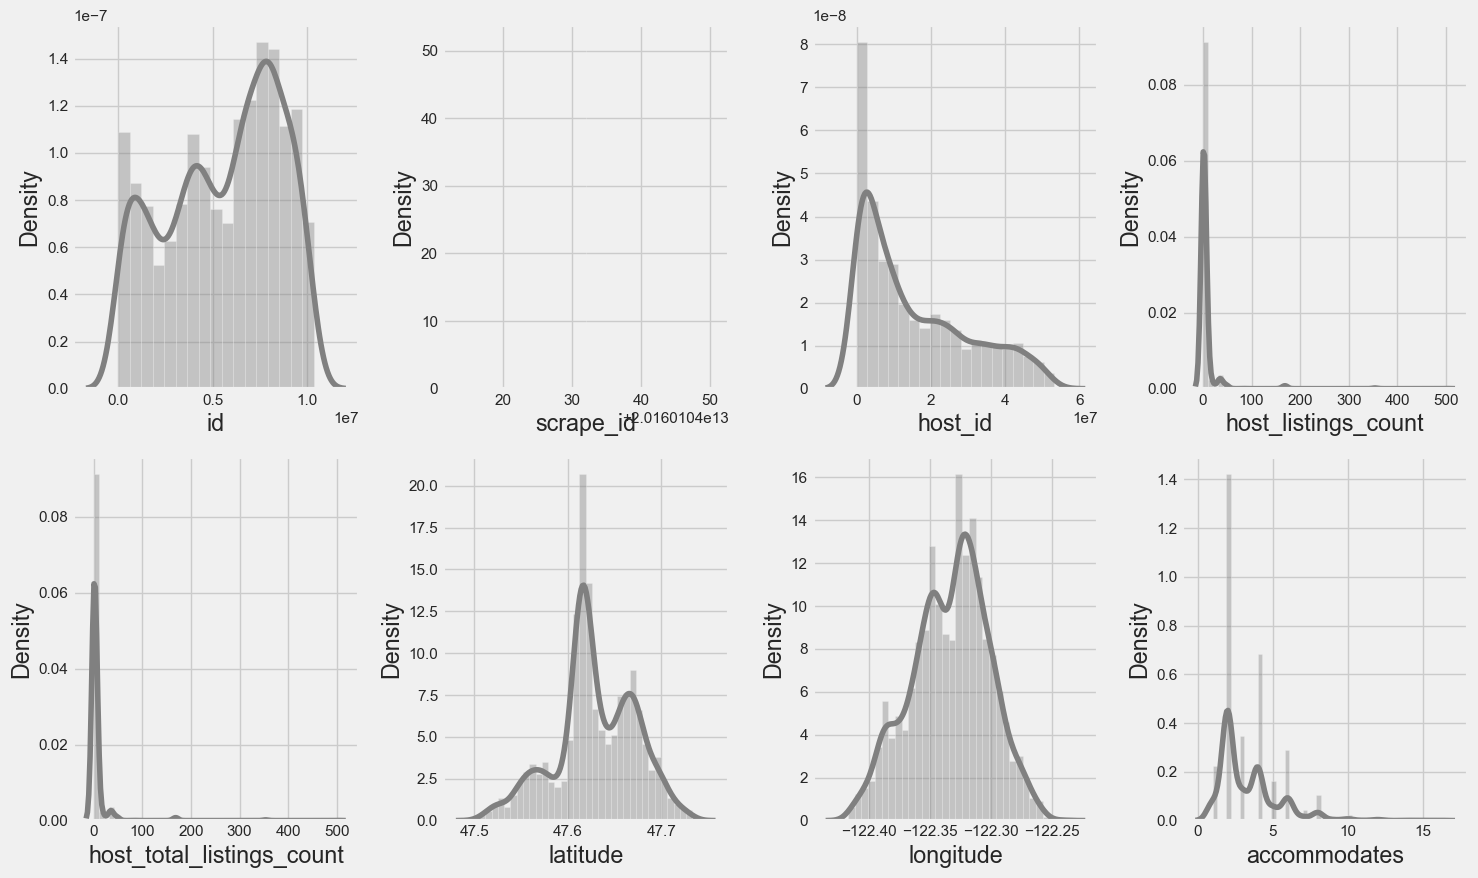

In [84]:
plt.figure(figsize=(15, 9))
for i in range(0, len(numeric_df2)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df2[numeric_df2[i]], color='gray')
    plt.tight_layout()

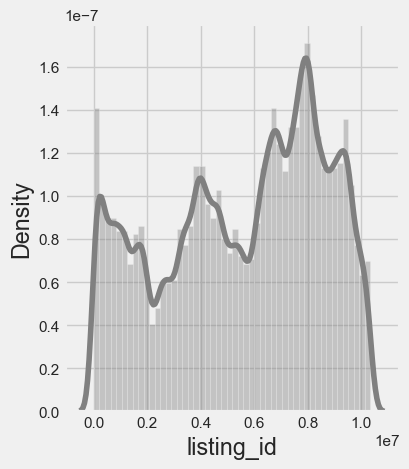

In [83]:
plt.figure(figsize=(15, 9))
for i in range(0, len(numeric_df3)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df3[numeric_df3[i]], color='gray')
    plt.tight_layout()

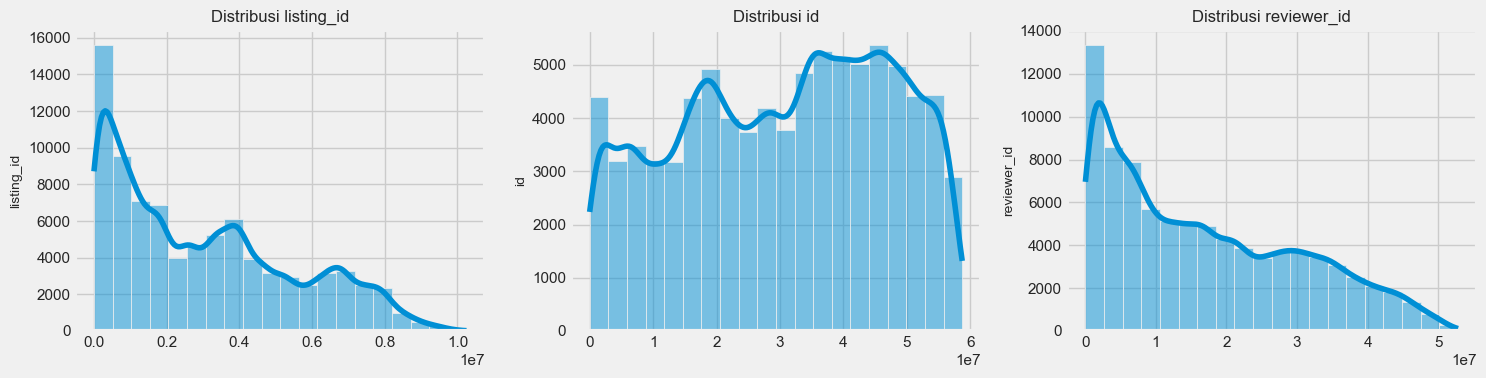

In [86]:
import math

num_cols = 5  # Misalnya, setiap baris ada 5 kolom
num_rows = math.ceil(len(numeric_df1) / num_cols)  # Hitung jumlah baris

plt.figure(figsize=(num_cols * 5, num_rows * 4))  # Atur ukuran agar cukup
for i, column in enumerate(numeric_df1):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df1[column], kde=True, bins=20)
    plt.title(f'Distribusi {column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel(column, fontsize=10)

plt.tight_layout()
plt.show()

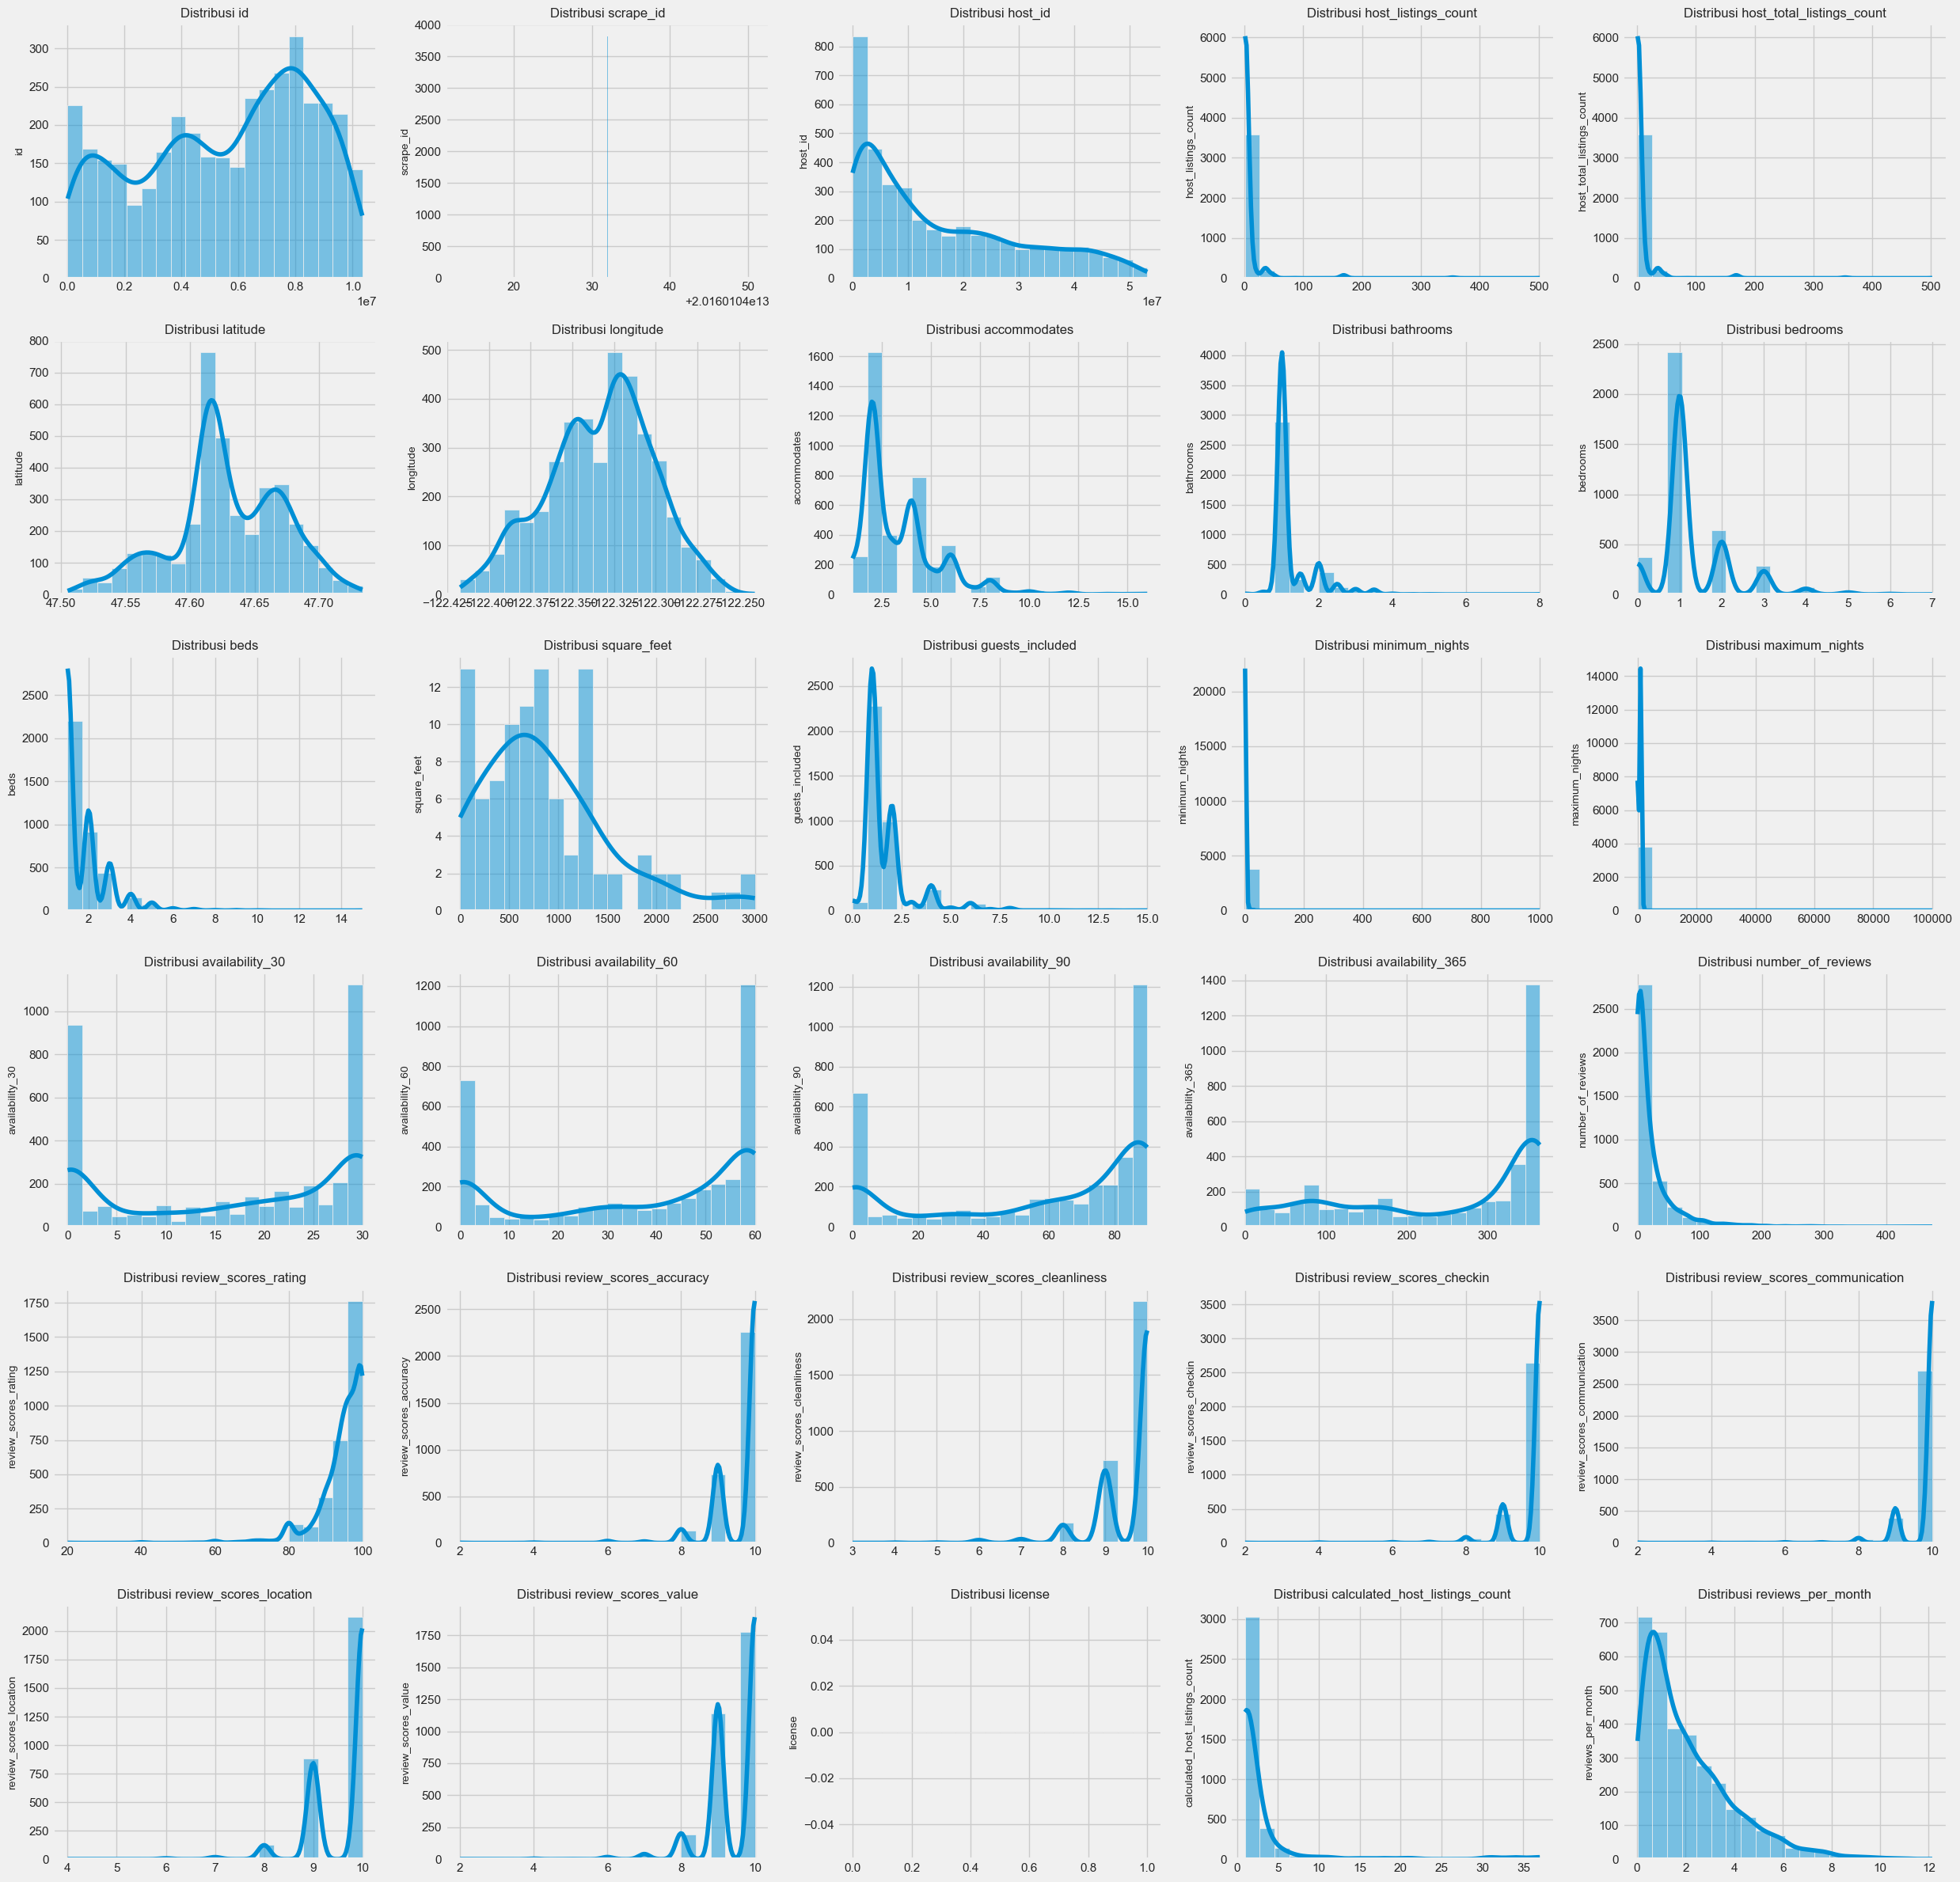

In [88]:
import math

num_cols = 5  # Misalnya, setiap baris ada 5 kolom
num_rows = math.ceil(len(numeric_df2) / num_cols)  # Hitung jumlah baris

plt.figure(figsize=(num_cols * 5, num_rows * 4))  # Atur ukuran agar cukup
for i, column in enumerate(numeric_df2):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df2[column], kde=True, bins=20)
    plt.title(f'Distribusi {column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel(column, fontsize=10)

plt.tight_layout()
plt.show()

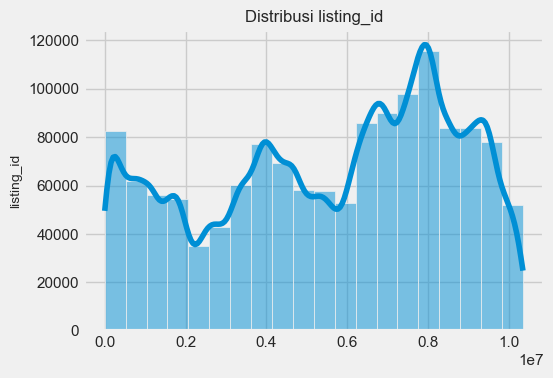

In [90]:
import math

num_cols = 5  # Misalnya, setiap baris ada 5 kolom
num_rows = math.ceil(len(numeric_df3) / num_cols)  # Hitung jumlah baris

plt.figure(figsize=(num_cols * 5, num_rows * 4))  # Atur ukuran agar cukup
for i, column in enumerate(numeric_df3):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df3[column], kde=True, bins=20)
    plt.title(f'Distribusi {column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel(column, fontsize=10)

plt.tight_layout()
plt.show()

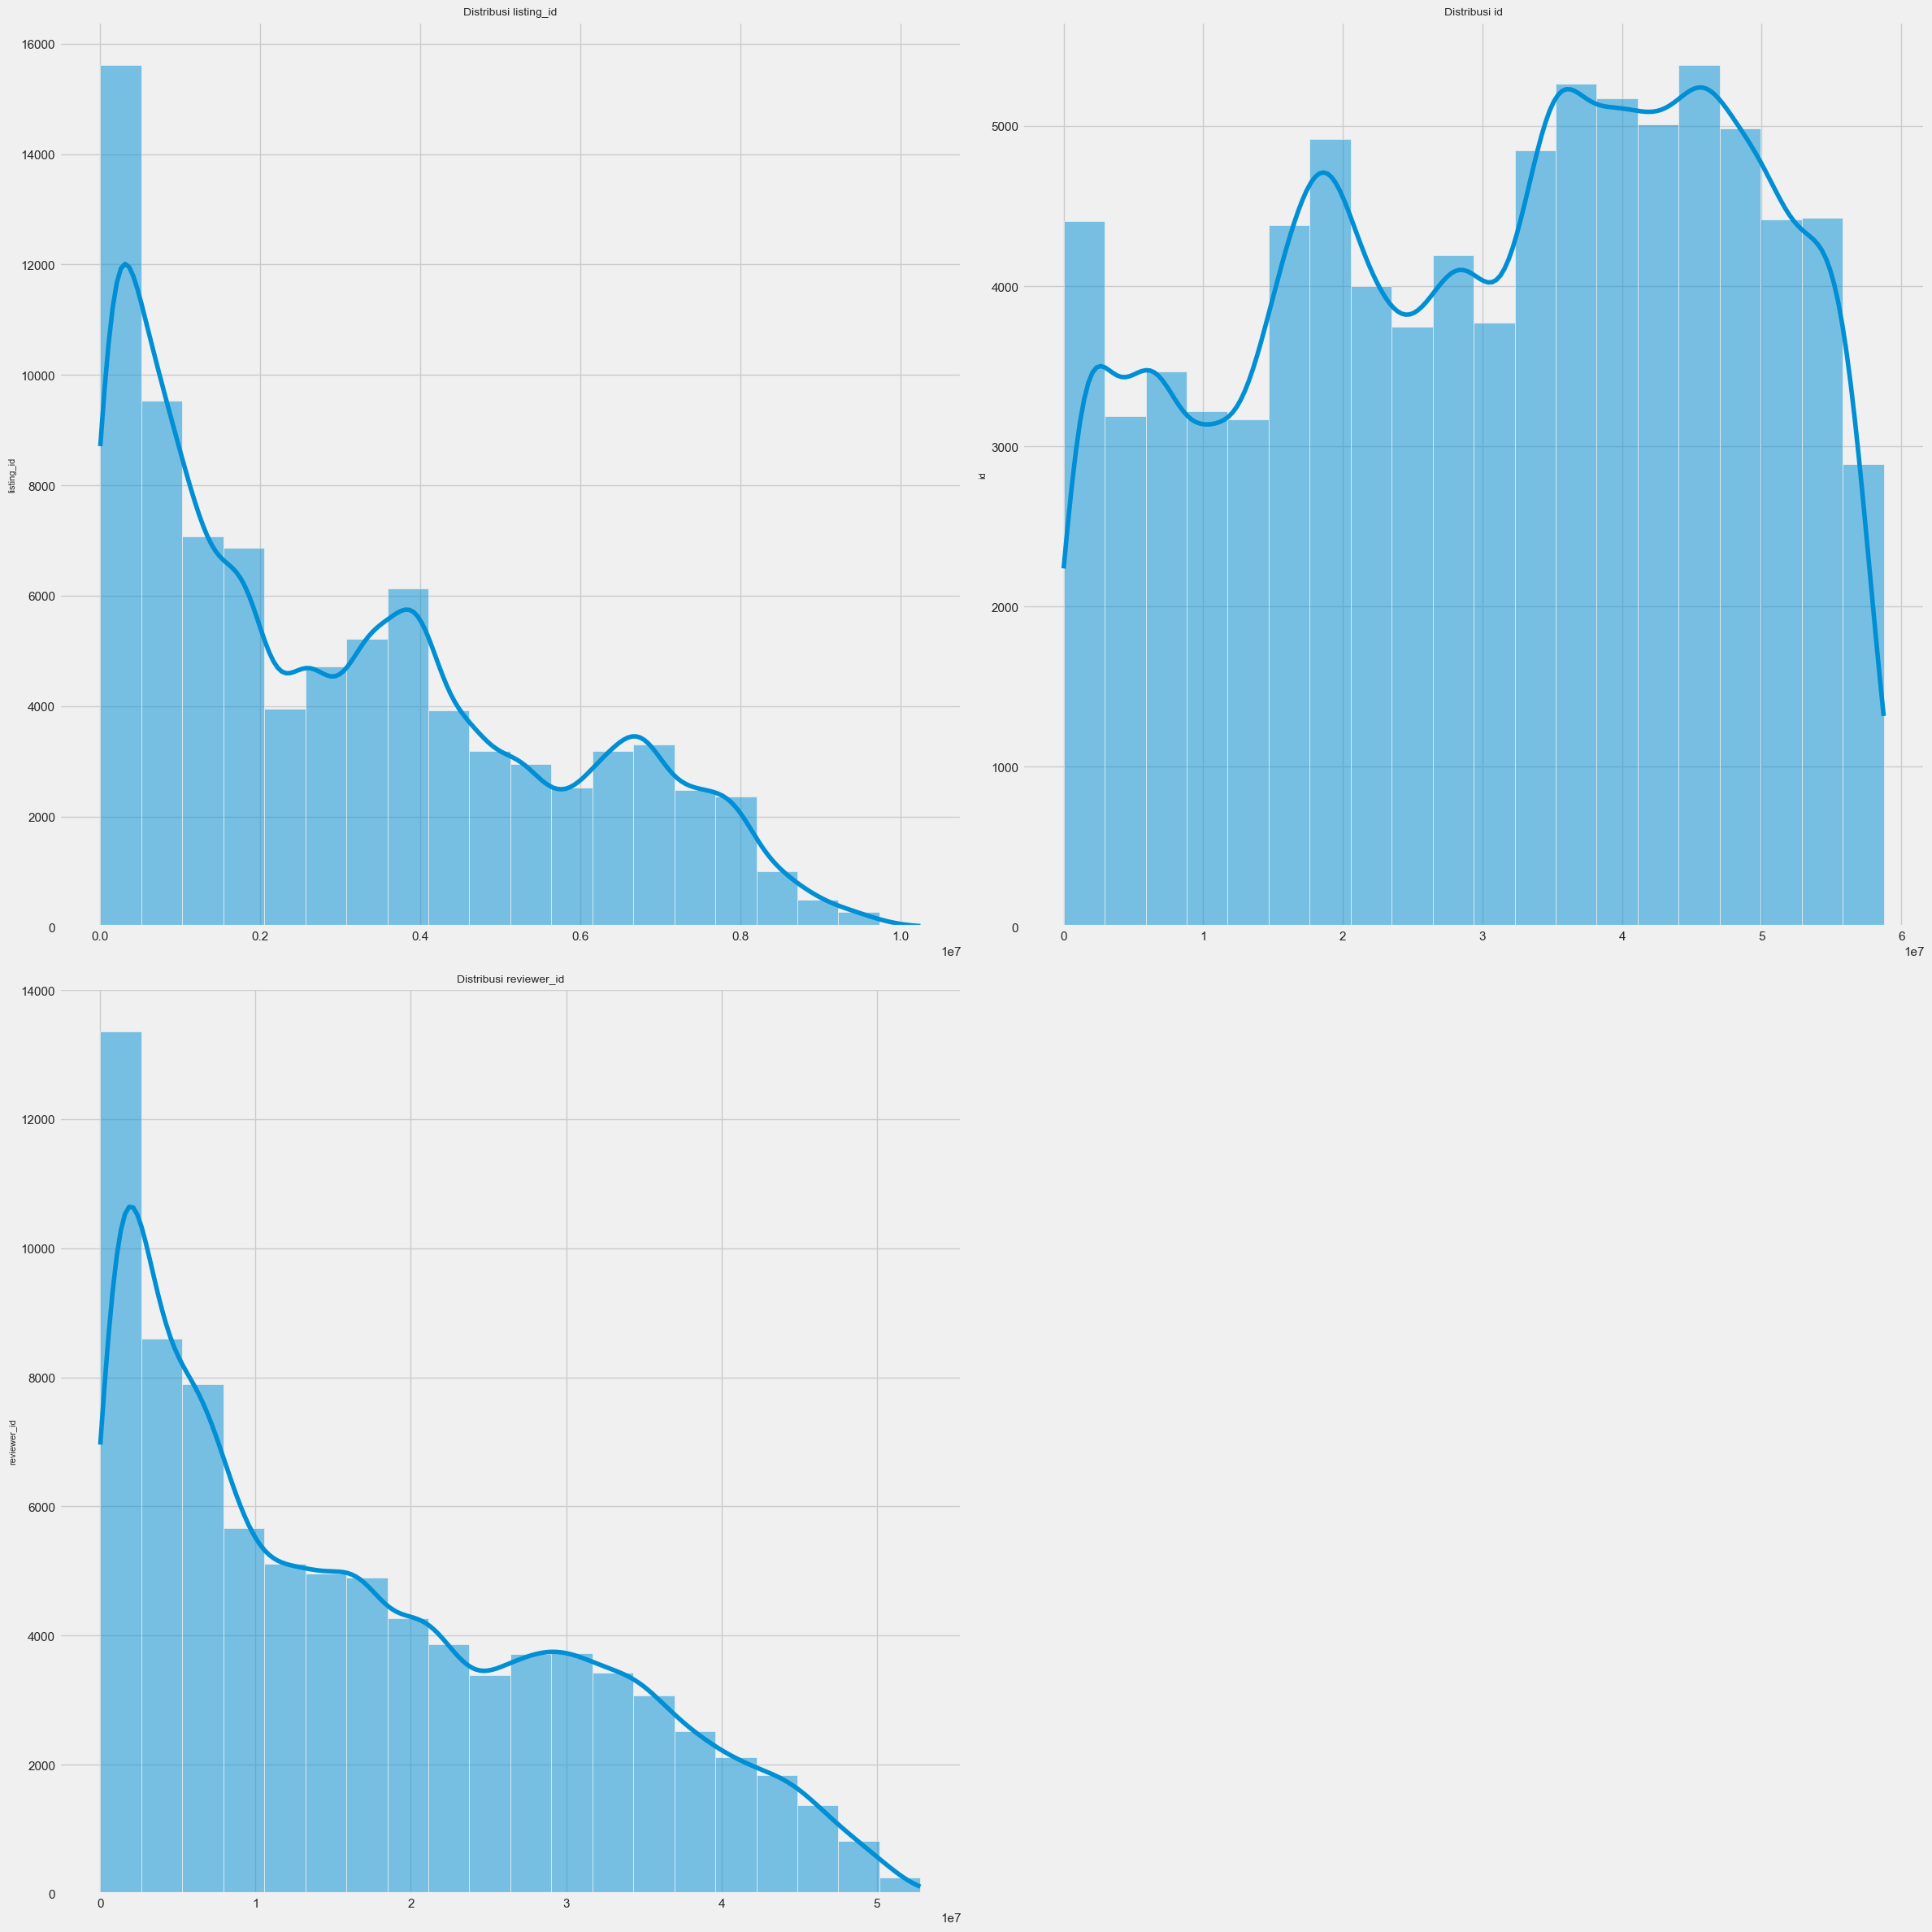

In [92]:
# Visualisasi distribusi histogram untuk semua kolom numerik kecuali 'id' dan 'exclusive'
#numerical_columns = [col for col in data.select_dtypes(include=['number']).columns if col not in ['id', 'exclusive']]
plt.figure(figsize=(24, 24))
for i, column in enumerate(numeric_df1):
    plt.subplot(2, (len(numeric_df1) + 1) // 2, i + 1)
    sns.histplot(df1[column], kde=True, bins=20)
    plt.title(f'Distribusi {column}', fontsize=10)
    plt.xlabel('', fontsize=8)
    plt.ylabel(column, fontsize=8)
plt.tight_layout()
plt.show()

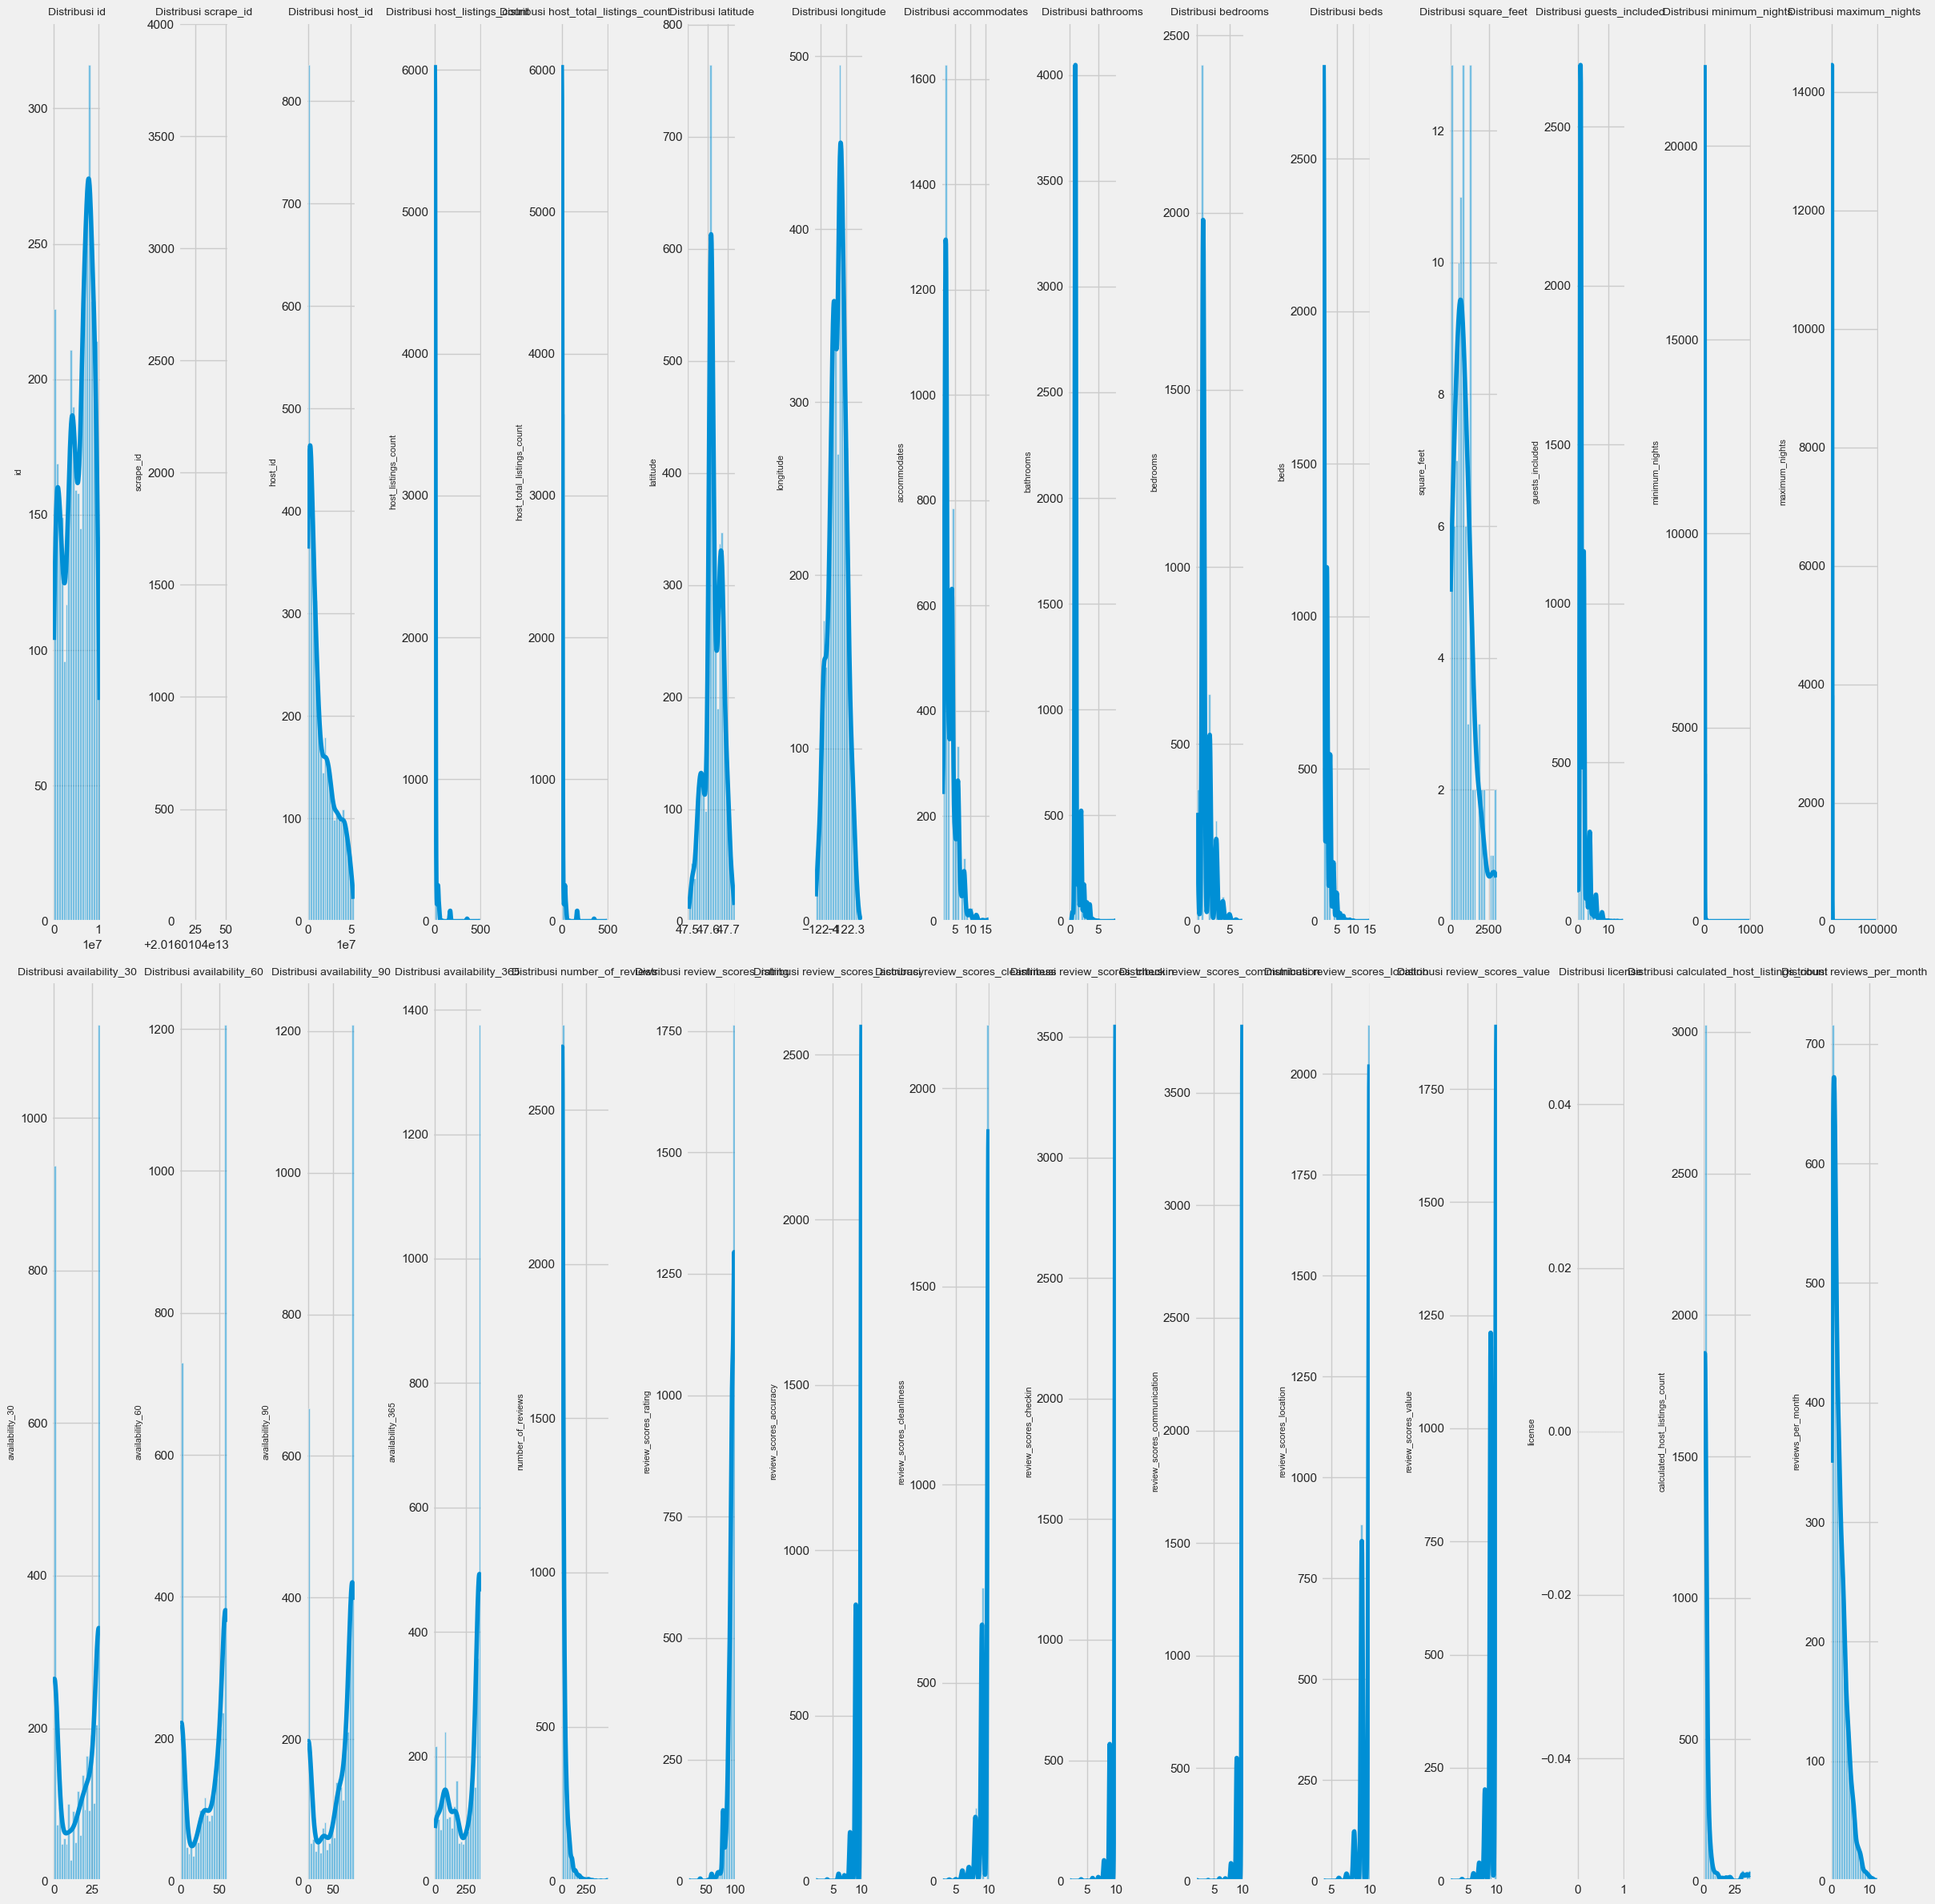

In [94]:
# Visualisasi distribusi histogram untuk semua kolom numerik kecuali 'id' dan 'exclusive'
#numerical_columns = [col for col in data.select_dtypes(include=['number']).columns if col not in ['id', 'exclusive']]
plt.figure(figsize=(24, 24))
for i, column in enumerate(numeric_df2):
    plt.subplot(2, (len(numeric_df2) + 1) // 2, i + 1)
    sns.histplot(df2[column], kde=True, bins=20)
    plt.title(f'Distribusi {column}', fontsize=10)
    plt.xlabel('', fontsize=8)
    plt.ylabel(column, fontsize=8)
plt.tight_layout()
plt.show()

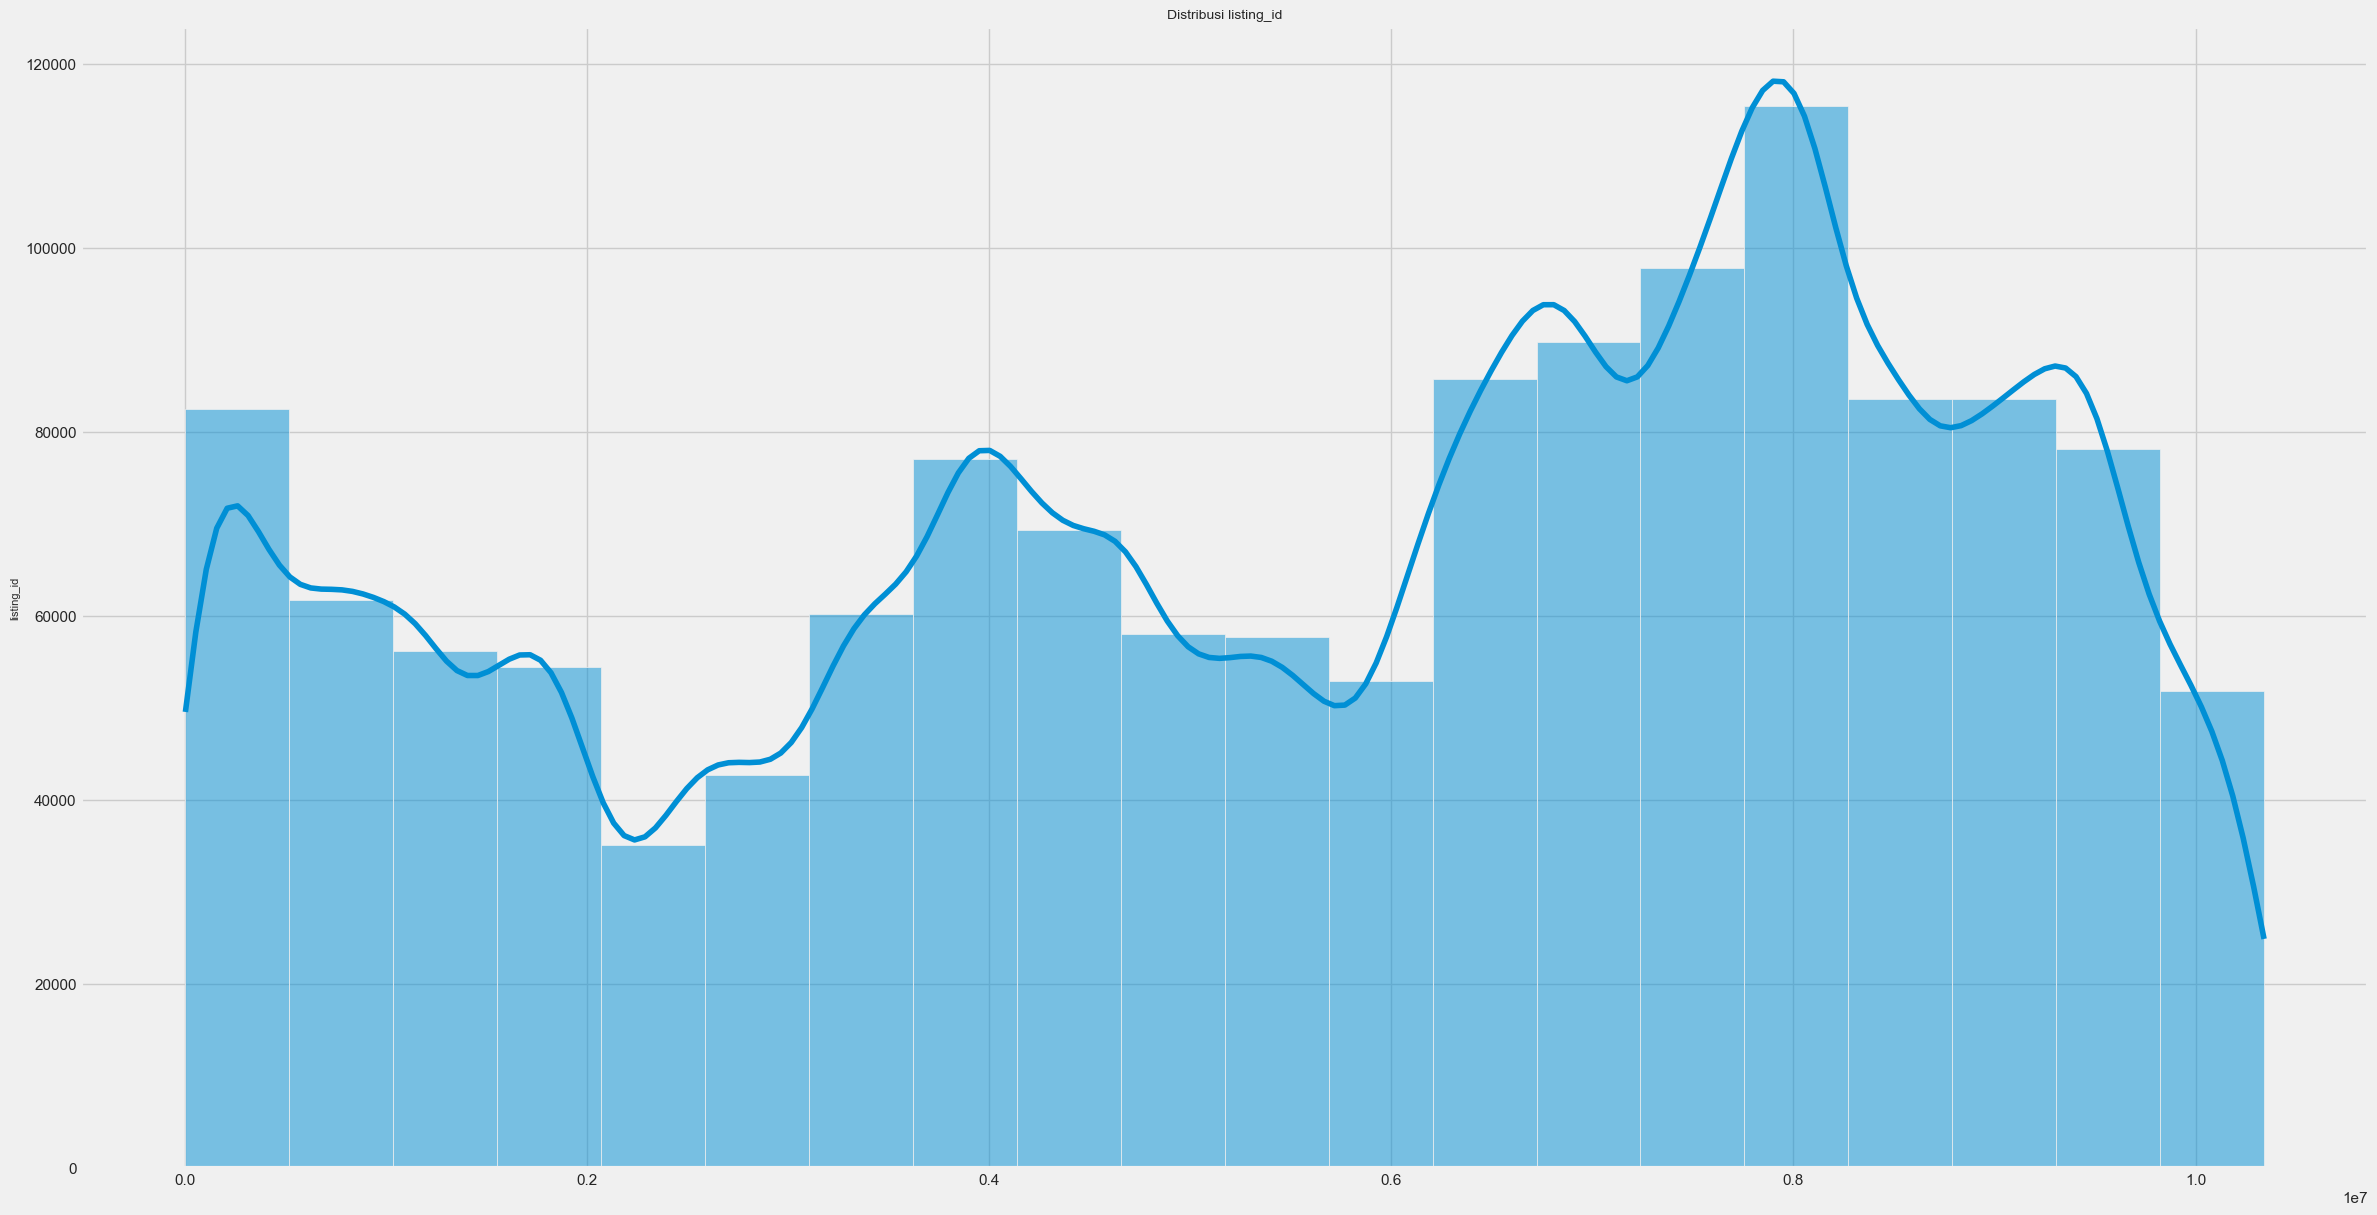

In [96]:
# Visualisasi distribusi histogram untuk semua kolom numerik kecuali 'id' dan 'exclusive'
#numerical_columns = [col for col in data.select_dtypes(include=['number']).columns if col not in ['id', 'exclusive']]
plt.figure(figsize=(24, 24))
for i, column in enumerate(numeric_df3):
    plt.subplot(2, (len(numeric_df3) + 1) // 2, i + 1)
    sns.histplot(df3[column], kde=True, bins=20)
    plt.title(f'Distribusi {column}', fontsize=10)
    plt.xlabel('', fontsize=8)
    plt.ylabel(column, fontsize=8)
plt.tight_layout()
plt.show()

## Multivariate Analysis (10 Poin)

In [98]:
df1[numeric_df1].describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [102]:
df1[numeric_df1].corr()

,listing_id,id,reviewer_id
listing_id,1.000000,0.634864,0.374604
id,0.634864,1.000000,0.554216
reviewer_id,0.374604,0.554216,1.000000


<Axes: >

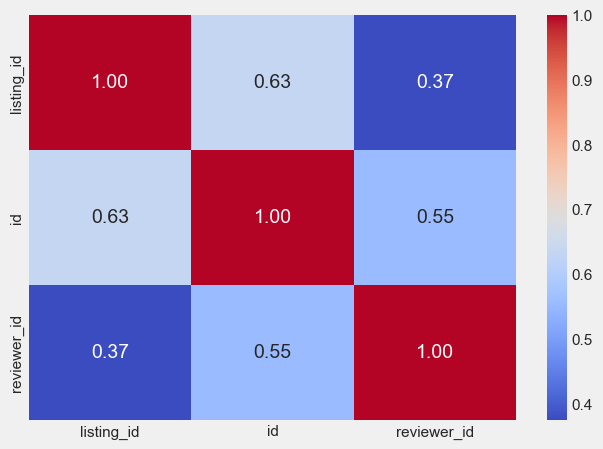

In [120]:
plt.figure(figsize=(7, 5))
sns.heatmap(df1[numeric_df1].corr(), cmap='coolwarm', annot=True, fmt='.2f')

In [42]:
merged_df2[numeric_df2].describe()

,listing_id,id,reviewer_id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,...,8.000000,8.000000,8.000000,8.0,8.0,8.000000,8.000000,0.0,9.000000,8.000000
mean,6.366580e+05,4.741792e+06,2.433284e+06,2.016010e+13,1.548287e+07,13.111111,13.111111,47.619501,-122.330262,2.666667,...,94.875000,9.000000,9.375000,10.0,10.0,9.500000,9.125000,NaN,4.000000,2.245000
std,6.572946e+05,3.396596e+06,1.780978e+06,0.000000e+00,1.637292e+07,27.374461,27.374461,0.043951,0.025521,1.936492,...,5.303301,2.070197,0.916125,0.0,0.0,0.534522,1.356203,NaN,6.576473,1.739351
min,5.682000e+03,3.921400e+05,3.189520e+05,2.016010e+13,1.034270e+05,1.000000,1.000000,47.542942,-122.383089,1.000000,...,83.000000,4.000000,8.000000,10.0,10.0,9.000000,6.000000,NaN,1.000000,0.050000
25%,2.086700e+05,1.589681e+06,7.592990e+05,2.016010e+13,3.313235e+06,1.000000,1.000000,47.603388,-122.331764,2.000000,...,93.750000,9.000000,8.750000,10.0,10.0,9.000000,9.000000,NaN,1.000000,0.545000
50%,4.753610e+05,4.565370e+06,2.045051e+06,2.016010e+13,1.268018e+07,1.000000,1.000000,47.609885,-122.318220,2.000000,...,96.500000,10.000000,10.000000,10.0,10.0,9.500000,9.500000,NaN,1.000000,2.600000
75%,8.594670e+05,7.527242e+06,4.199518e+06,2.016010e+13,2.051944e+07,6.000000,6.000000,47.664047,-122.315261,2.000000,...,98.000000,10.000000,10.000000,10.0,10.0,10.000000,10.000000,NaN,2.000000,3.370000
max,2.110357e+06,9.908825e+06,4.881286e+06,2.016010e+13,5.055004e+07,84.000000,84.000000,47.678761,-122.307437,6.000000,...,100.000000,10.000000,10.000000,10.0,10.0,10.000000,10.000000,NaN,21.000000,4.450000


<Axes: >

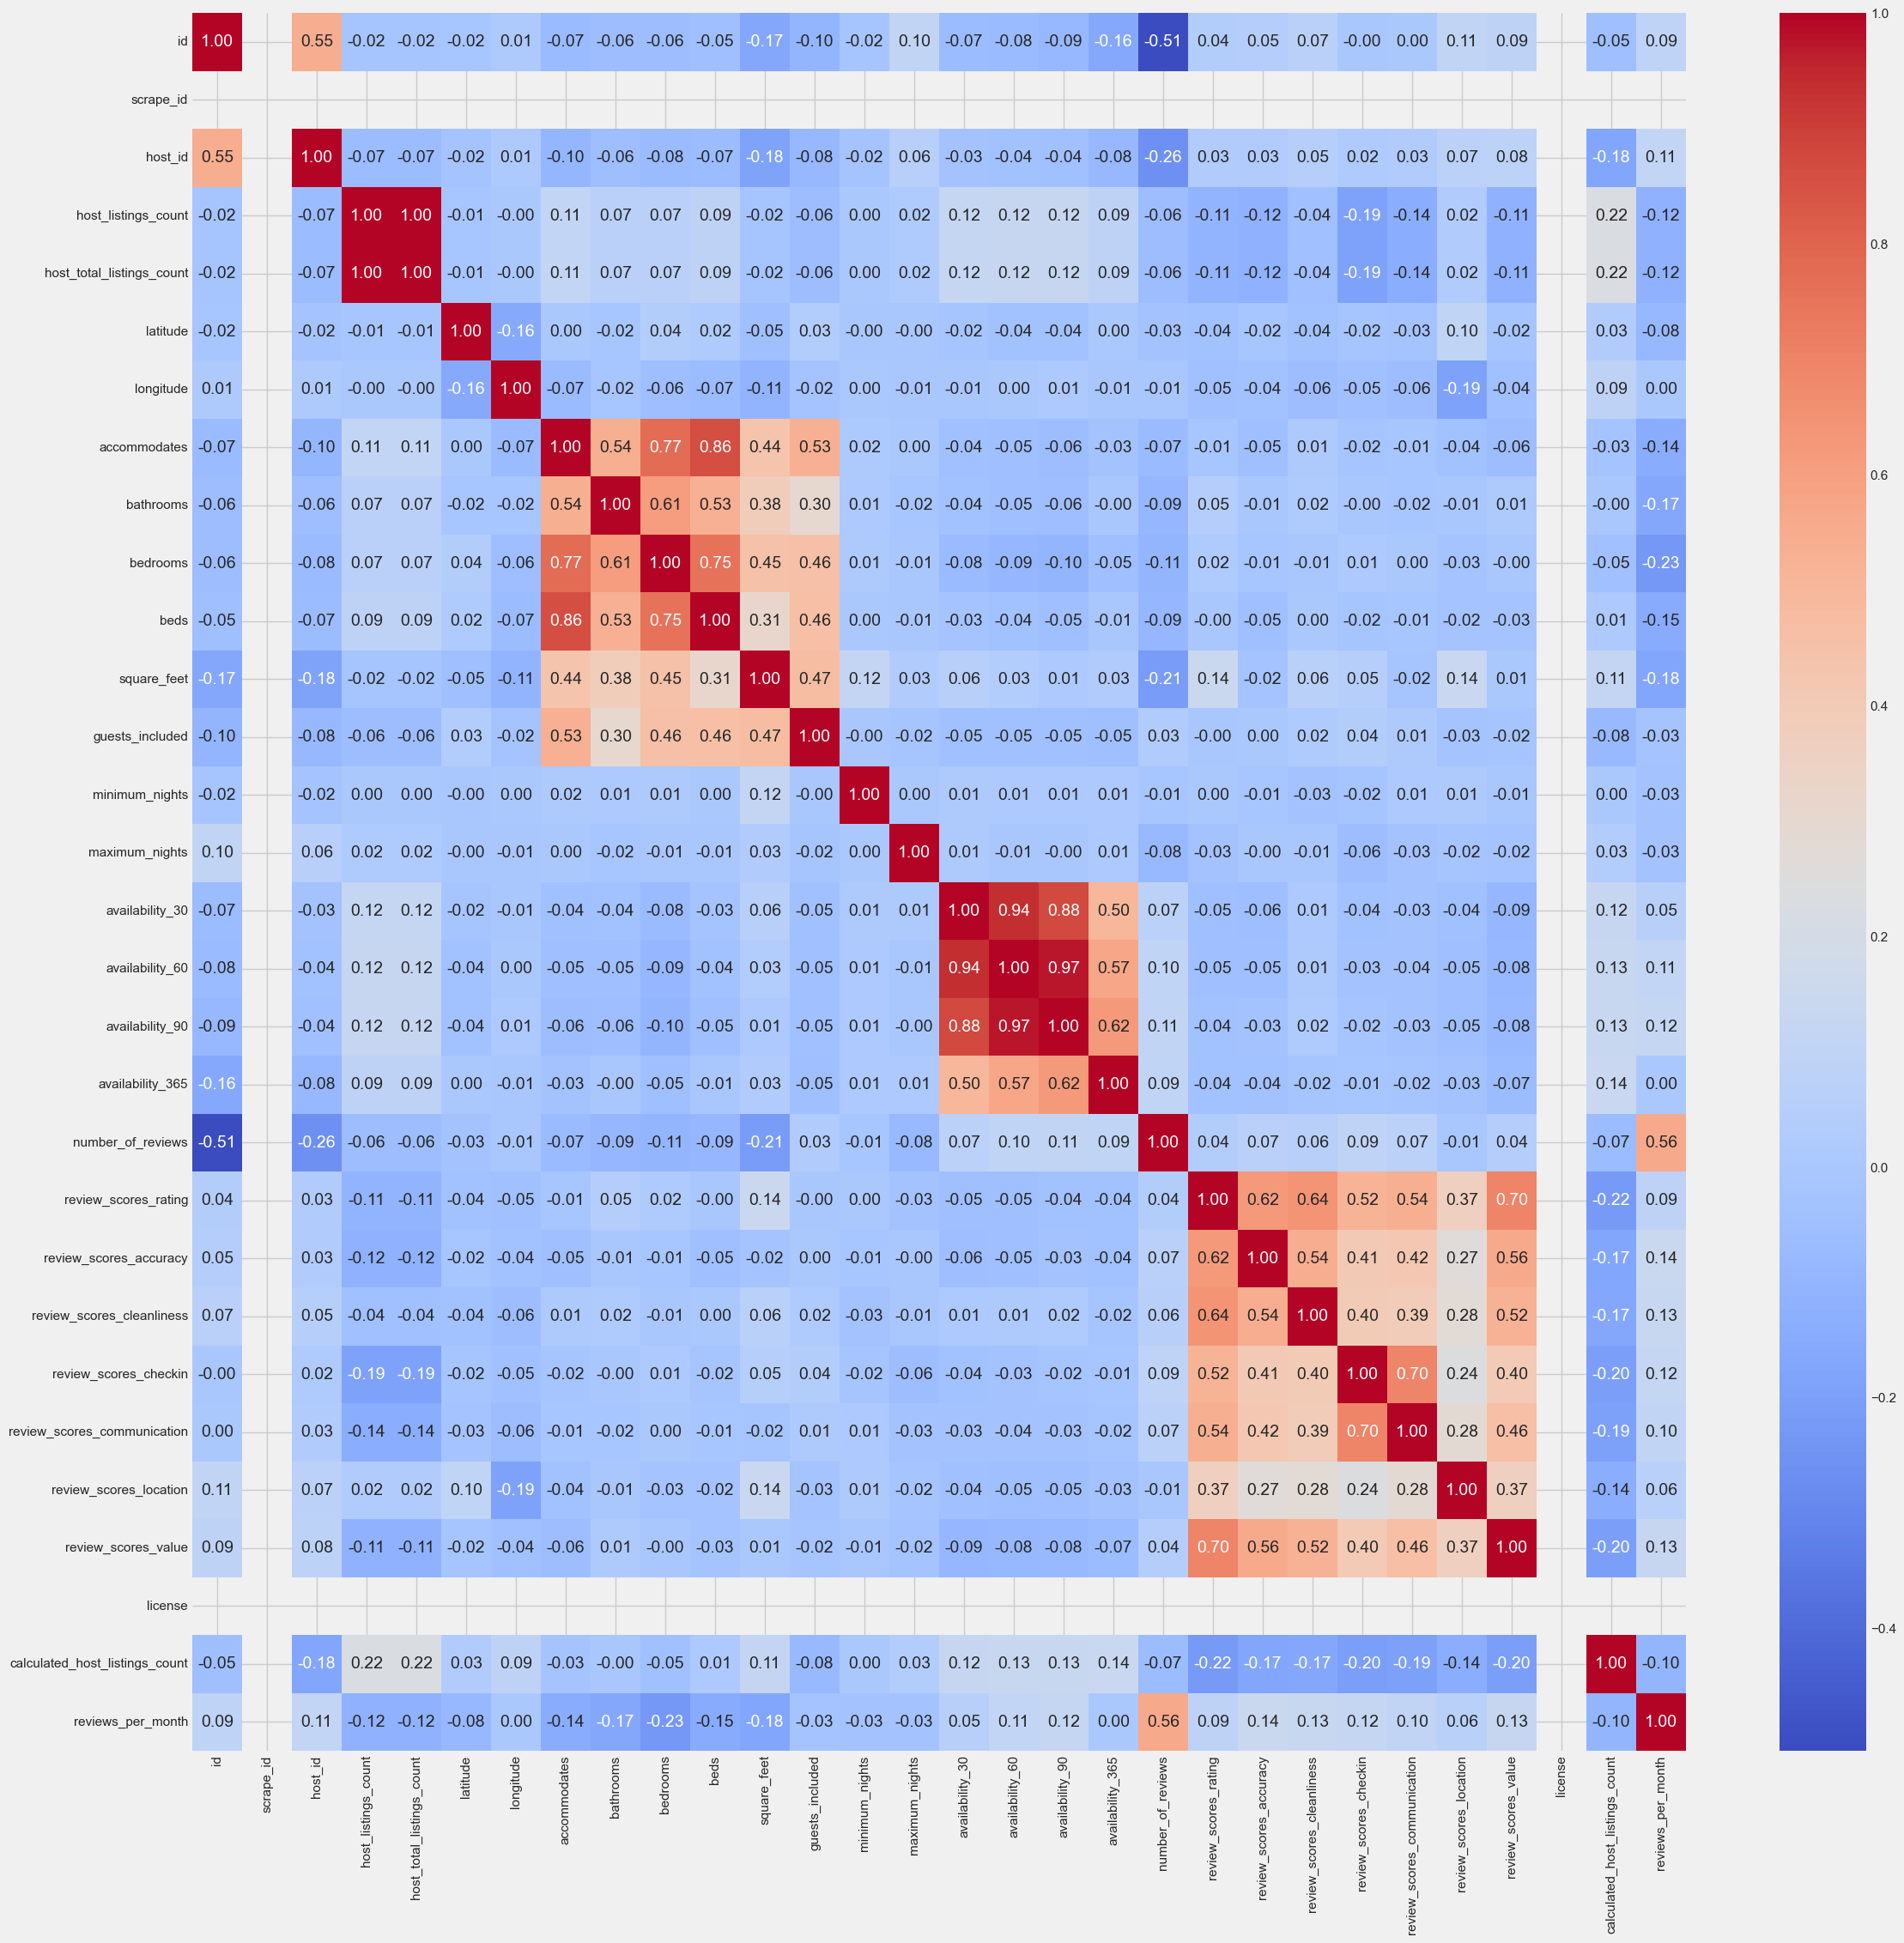

In [126]:
plt.figure(figsize=(25, 25))
sns.heatmap(df2[numeric_df2].corr(), cmap='coolwarm', annot=True, fmt='.2f')

<Axes: >

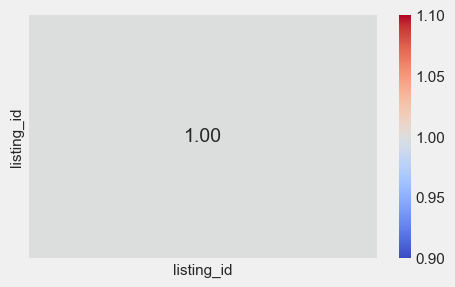

In [139]:
plt.figure(figsize=(5, 3))
sns.heatmap(df3[numeric_df3].corr(), cmap='coolwarm', annot=True, fmt='.2f')

# Data Preparation

## Missing Value

In [149]:
print(df1.isna().sum().to_string())

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18


In [151]:
print(df2.isna().sum().to_string())

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [153]:
print(df3.isna().sum().to_string())

listing_id         0
date               0
available          0
price         459028


## Duplicate Values (5 Poin)

In [161]:
df1.duplicated().sum()

0

In [163]:
df2.duplicated().sum()

0

In [159]:
df3.duplicated().sum()

0

## Outliers (5 Poin)

In [181]:
# hitung quartile
Q1 = df1[numeric_df1].quantile(0.25)
Q3 = df1[numeric_df1].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df1[numeric_df1] < lower_bound) | (df1[numeric_df1] > upper_bound)
outliers_count = outliers.sum()
print("Jumlah outliers per kolom:")
print(outliers_count)

Jumlah outliers per kolom:
listing_id     0
id             0
reviewer_id    0
dtype: int64


In [189]:
#hitung quartile
Q1 = df2[numeric_df2].quantile(0.25)
Q3 = df2[numeric_df2].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df2[numeric_df2] < lower_bound) | (df2[numeric_df2] > upper_bound)
outliers_count = outliers.sum()
print("Jumlah outliers per kolom:")
print(outliers_count)

Jumlah outliers per kolom:
id                                  0
scrape_id                           0
host_id                             0
host_listings_count               459
host_total_listings_count         459
latitude                           75
longitude                           1
accommodates                      184
bathrooms                         920
bedrooms                          100
beds                              271
square_feet                         4
guests_included                   382
minimum_nights                    305
maximum_nights                      1
availability_30                     0
availability_60                     0
availability_90                     0
availability_365                    0
number_of_reviews                 364
review_scores_rating              207
review_scores_accuracy             40
review_scores_cleanliness          80
review_scores_checkin             516
review_scores_communication       467
review_scores_location 

In [191]:
# hitung quartile
Q1 = df3[numeric_df3].quantile(0.25)
Q3 = df3[numeric_df3].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df3[numeric_df3] < lower_bound) | (df3[numeric_df3] > upper_bound)
outliers_count = outliers.sum()
print("Jumlah outliers per kolom:")
print(outliers_count)

Jumlah outliers per kolom:
listing_id    0
dtype: int64


In [ ]:
df1_cleaned = df1[~((df1[numeric_df1] < lower_bound) | (df1[numeric_df1] > upper_bound)).any(axis=1)]

In [ ]:
df2_cleaned = df2[~((df2[numeric_df2] < lower_bound) | (df2[numeric_df2] > upper_bound)).any(axis=1)]

In [ ]:
df3_cleaned = df3[~((df3[numeric_df3] < lower_bound) | (df3[numeric_df3] > upper_bound)).any(axis=1)]

In [ ]:
from scipy import stats

# Menghitung Z-score untuk kolom numerik
z_scores = stats.zscore(df1[numeric_df1])

# Menentukan outliers dengan z-score lebih dari 3 atau kurang dari -3
outliers_z = (z_scores > 3) | (z_scores < -3)

# Menampilkan jumlah outliers per kolom
outliers_z_count = outliers_z.sum(axis=0)
print("Jumlah outliers berdasarkan z-score per kolom:")
print(outliers_z_count)

# Menghapus outliers
df1_cleaned_z = df1[(z_scores < 3) & (z_scores > -3)].copy()

In [ ]:
from scipy import stats

# Menghitung Z-score untuk kolom numerik
z_scores = stats.zscore(df2[numeric_df2])

# Menentukan outliers dengan z-score lebih dari 3 atau kurang dari -3
outliers_z = (z_scores > 3) | (z_scores < -3)

# Menampilkan jumlah outliers per kolom
outliers_z_count = outliers_z.sum(axis=0)
print("Jumlah outliers berdasarkan z-score per kolom:")
print(outliers_z_count)

# Menghapus outliers
df2_cleaned_z = df2[(z_scores < 3) & (z_scores > -3)].copy()

In [ ]:
from scipy import stats

# Menghitung Z-score untuk kolom numerik
z_scores = stats.zscore(df3[numeric_df3])

# Menentukan outliers dengan z-score lebih dari 3 atau kurang dari -3
outliers_z = (z_scores > 3) | (z_scores < -3)

# Menampilkan jumlah outliers per kolom
outliers_z_count = outliers_z.sum(axis=0)
print("Jumlah outliers berdasarkan z-score per kolom:")
print(outliers_z_count)

# Menghapus outliers
df3_cleaned_z = df3[(z_scores < 3) & (z_scores > -3)].copy()

In [ ]:
print(f"Jumlah baris sebelum pembersihan: {len(df1)}")
print(f"Jumlah baris setelah pembersihan: {len(df1_cleaned)}")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sebelum membersihkan outliers
sns.boxplot(x=df1['price'])
plt.title("Distribusi Harga Sebelum Membersihkan Outliers")
plt.show()

# Setelah membersihkan outliers
sns.boxplot(x=df1_cleaned['price'])
plt.title("Distribusi Harga Setelah Membersihkan Outliers")
plt.show()

## Normalization/Standardization (5 Poin)


In [ ]:
sns.kdeplot(df['price'])

In [ ]:
# LOG TRANSFORMATION
df['log_number_of_reviews'] = np.log1p(df['number_of_reviews'])
df['log_love'] = np.log1p(df['love'])
df['log_price'] = np.log1p(df['price'])
df['log_value_price'] = np.log1p(df['value_price'])

In [ ]:
sns.kdeplot(df['log_price'])

## Feature encoding (5 Poin)

In [ ]:
df = df[['rating','brand','category','log_number_of_reviews', 'log_love', 'log_price', 'log_value_price', 'exclusive']]
df.describe()

In [ ]:
# Feature extraction
# Encoding dengan tiga serangkai (mean, std, count) menggunakan 'exclusive'
df['brand_mean_exclusive'] = df.groupby('brand')['exclusive'].transform('mean')
df['brand_std_exclusive'] = df.groupby('brand')['exclusive'].transform('std')
df['brand_count_exclusive'] = df.groupby('brand')['exclusive'].transform('count')

df['category_mean_exclusive'] = df.groupby('category')['exclusive'].transform('mean')
df['category_std_exclusive'] = df.groupby('category')['exclusive'].transform('std')
df['category_count_exclusive'] = df.groupby('category')['exclusive'].transform('count')

In [ ]:
# visualisasi
# Distribusi harga
plt.figure(figsize=(8, 6))
sns.kdeplot(df_clean['price'], color='blue', label='Price')
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel('Density')
plt.legend()
plt.show()

# Rating vs Jumlah Review
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating', y='number_of_reviews', data=df_clean, hue='exclusive', alpha=0.7)
plt.title('Rating vs Jumlah Review')
plt.xlabel('Rating')
plt.ylabel('Jumlah Review')
plt.legend(title='Exclusive')
plt.show()

In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

X = df.drop(['brand', 'category','exclusive'], axis=1)
y = df['exclusive']

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(X_train.dtypes)


## Class imbalance (5 Poin)

In [ ]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Pilihan: 'mean', 'median', 'most_frequent'
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

In [ ]:
# --- HANDLE CLASS IMBALANCE ---
# Sebelum SMOTE
print("Distribusi kelas sebelum SMOTE:")
print(y_train.value_counts())

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Setelah SMOTE
print("\nDistribusi kelas setelah SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Feature Engineering

In [ ]:
data = df.drop(columns=['id', 'value_price','log_value_price'], errors='ignore')

In [ ]:
import pandas as pd

# Drop kolom yang tidak ingin dihitung korelasinya
df_corr = data.drop(columns=['id', 'brand', 'category', 'log_value_price'], errors='ignore')

# Hitung matriks korelasi
correlation_matrix = df_corr.corr()

# Tampilkan matriks korelasi
correlation_matrix

In [ ]:
# Feature engineering
# 1. log_love_per_log_number_of_reviews
df['log_love_per_log_number_of_reviews'] = df['log_love'] / df['log_number_of_reviews']

# 2. brand_popularity: Rata-rata ulasan per merek
df['brand_popularity'] = df.groupby('brand')['log_number_of_reviews'].transform('mean')

# 3. category_value: Rata-rata harga per kategori produk
df['category_value'] = df.groupby('category')['log_price'].transform('mean')

# 4. price / category_mean_price
df['category_mean_price'] = df.groupby('category')['log_price'].transform('mean')
df['price_per_category_mean_price'] = df['log_price'] / df['category_mean_price']

In [ ]:
df